In [218]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Pauli
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

def deutsch_circuit(Uf: QuantumCircuit):
    """
    Build deutsch circuit with given oracle.
    """
    qc = QuantumCircuit(2,1)
    qc.x(1)
    qc.h(1)
    qc.h(0)
    qc.compose(Uf, inplace=True)
    qc.h(0)
    qc.measure(0,0)

    return qc

def apply_deutsch(Uf: QuantumCircuit):
    """
    Run deutsch algorithm on given oracle.
    """
    sim = AerSimulator()
    qc = deutsch_circuit(Uf)
    job = sim.run(qc, shots=1, memory=True)
    result = job.result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"
    

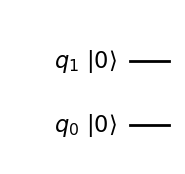

In [210]:
Uf_circuit1 = deutsch_function(1)
Uf_circuit2 = deutsch_function(2)
Uf_circuit3 = deutsch_function(3)
Uf_circuit4 = deutsch_function(4)
Uf_circuit1.draw(output='mpl', cregbundle=False, initial_state=True, reverse_bits=True)


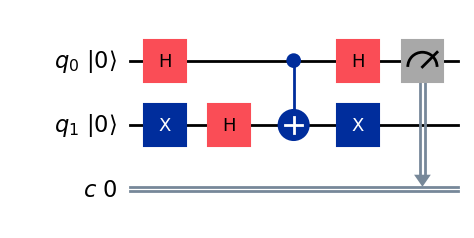

In [214]:
qc1 = deutsch_circuit(Uf_circuit1)
deutsch_circuit(deutsch_function(3)).draw(output='mpl', cregbundle=False, initial_state=True)

In [221]:
print(apply_deutsch(Uf_circuit3))

constant
